In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as mdj
import pandas as pd
import plumed 


In [ ]:
traj = mdj.load_dcd('../007_r/outputs_eq/traj.dcd', '../inputs/protein_ligand.pdb')

In [ ]:
pdb = mdj.load_pdb('../inputs/protein.pdb')
ref_com = mdj.compute_center_of_mass(pdb)
coms = mdj.compute_center_of_mass(traj, select='protein and type!="H"')
translation_cv = np.linalg.norm(coms - ref_com, axis=1)

In [ ]:

protein_coms = mdj.compute_center_of_mass(traj, select='protein and type!="H"')
ligand_coms = mdj.compute_center_of_mass(traj, select='resname "MOL" and type!="H"')
r_cv = np.linalg.norm(protein_coms - ligand_coms, axis=1)

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/tools_drivers/plumed2-2.8.1/src/lib/libplumedKernel.so" +++


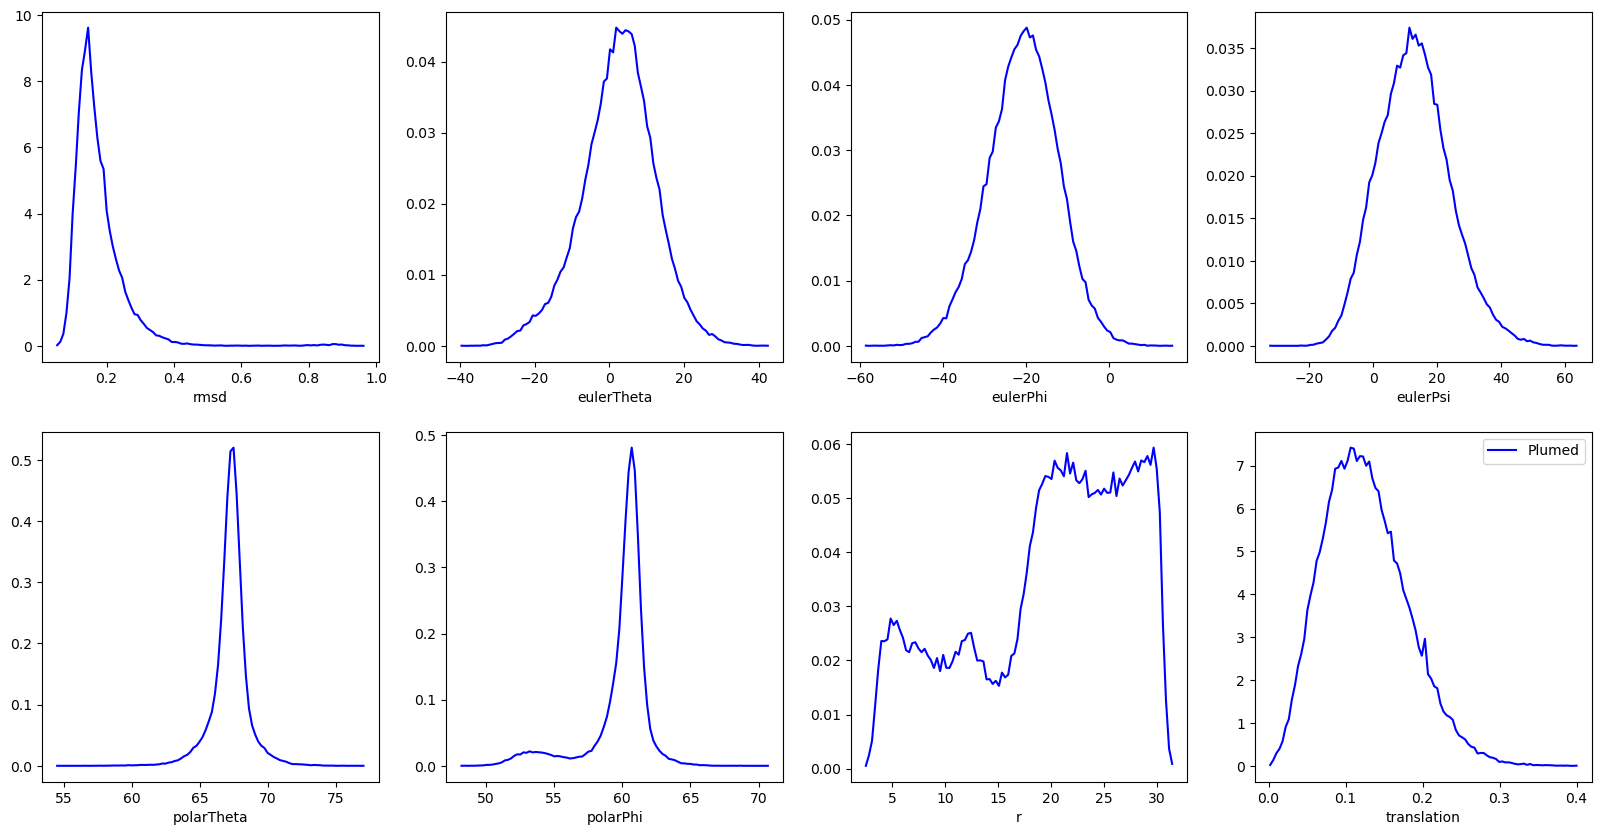

In [4]:

plumed_CVs = plumed.read_as_pandas('../../openmm_plumed/007_r/COLVAR')
plumed_CVs['rmsd'] *= 10
plumed_CVs['translation'] *= 10
plumed_CVs['r'] *= 10
CV_names = ['rmsd', 'eulerTheta', 'eulerPhi', 'eulerPsi', 'polarTheta', 'polarPhi', 'r', 'translation'] 

# openmm_CVs = pd.read_csv("../0000_Eq/COLVAR", sep='\\t', names=CV_names, engine='python')
# openmm_CVs['rmsd'] *= 10
# openmm_CVs['rmsd']
#, 'polarTheta', 'polarPhi', 'r', 'translation']
fig, axes = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(20, 10)
axes = axes.flatten()
for idx, cv_name in enumerate(CV_names):
    bins, edges = np.histogram(plumed_CVs[cv_name], bins=100, density=True)
    axes[idx].plot(edges[:-1], bins, 'b', label="Plumed")

    # bins, edges = np.histogram(openmm_CVs[cv_name], bins=100, density=True)
    # axes[idx].plot(edges[:-1], bins, 'g', label="OpenMM")
    # center = round(edges[np.argmax([bins])], 2)
    # print(f'{cv_name}, center={center}, range= {edges[np.argmax([bins])] -20.00, edges[np.argmax([bins])] + 20.00} \n')
    # axes[idx].text(0.81, 0.5, f'OpCV={center}', horizontalalignment='center', 
    #                verticalalignment='center', transform=axes[idx].transAxes)
    axes[idx].set_xlabel(cv_name)
plt.legend(loc="best")    
plt.savefig('../analysis/figures/OpenMM_Plumed_r_cvs_hist.png')

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/ndonyapour/tools_drivers/plumed2-2.8.1/src/lib/libplumedKernel.so" +++
/tmp/ipykernel_110546/3918823762.py:21: RuntimeWarning: divide by zero encountered in log
  free_energy_op_unbiased = GAS_CONSTANT * TEMPERATURE * np.negative(np.log(bins)) / 4.184
/tmp/ipykernel_110546/3918823762.py:26: RuntimeWarning: divide by zero encountered in log
  free_energy_op_unbiased = GAS_CONSTANT * TEMPERATURE * np.negative(np.log(bins)) / 4.184


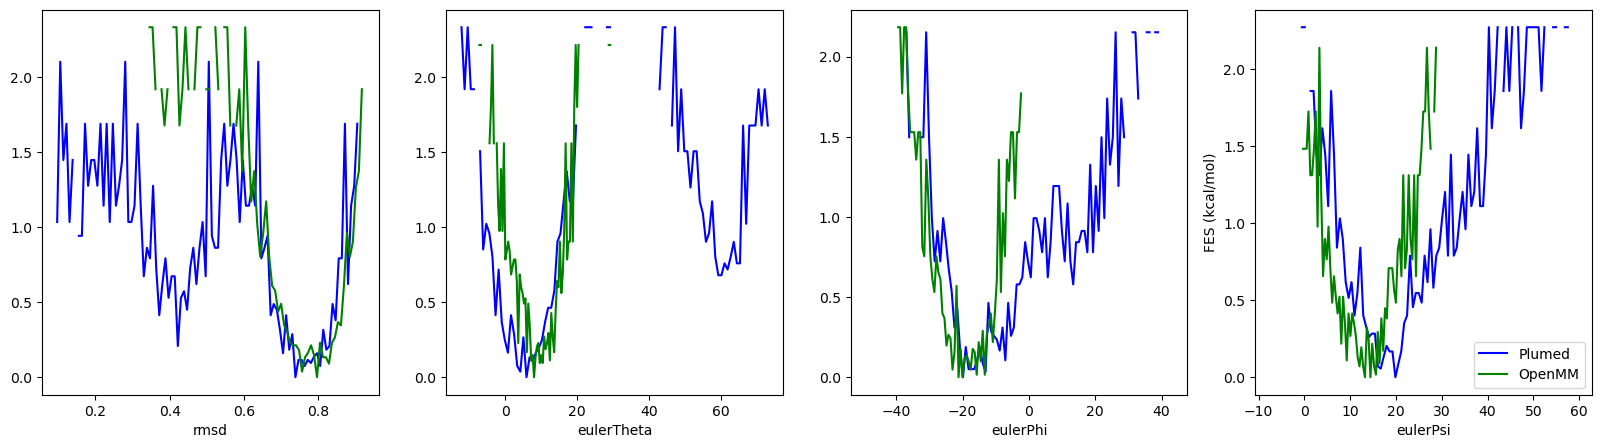

In [18]:
# dG = -RT ln P, R is the gas constant 
TEMPERATURE = 300 #* unit.kelvin
GAS_CONSTANT = 8.314e-3  #kJ/(mol·K)
# unbiased openmm

plumed_CVs = plumed.read_as_pandas('../../openmm_plumed/0000_eq/COLVAR')
plumed_CVs['rmsd'] *= 10
plumed_CVs['translation'] *= 10
plumed_CVs['r'] *= 10
CV_names = ['rmsd', 'eulerTheta', 'eulerPhi', 'eulerPsi'] 

openmm_CVs = pd.read_csv("../0000_Eq/COLVAR", sep='\\t', names=CV_names, engine='python')
openmm_CVs['rmsd'] *= 10
openmm_CVs['rmsd']
#, 'polarTheta', 'polarPhi', 'r', 'translation']
fig, axes = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(20, 5)
axes = axes.flatten()
for idx, cv_name in enumerate(CV_names):
    bins, edges = np.histogram(plumed_CVs[cv_name], bins=100, density=True)
    free_energy_op_unbiased = GAS_CONSTANT * TEMPERATURE * np.negative(np.log(bins)) / 4.184
    min_fes = min(free_energy_op_unbiased)
    axes[idx].plot(edges[:-1], free_energy_op_unbiased - min_fes, 'b', label="Plumed")
    
    bins, edges = np.histogram(openmm_CVs[cv_name], bins=100, density=True)
    free_energy_op_unbiased = GAS_CONSTANT * TEMPERATURE * np.negative(np.log(bins)) / 4.184
    min_fes = min(free_energy_op_unbiased)
    axes[idx].plot(edges[:-1], free_energy_op_unbiased - min_fes, 'g', label="OpenMM")
    axes[idx].set_xlabel(cv_name)

plt.ylabel("FES (kcal/mol)")
plt.legend()
plt.savefig("figures/histogram_fes.png")